In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/raw/eeg-headset.csv"
df = pd.read_csv(file_path)

# Show the first five rows
print(df.head())

       AF3       F7       F3      FC5       T7        P       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eye_state  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85          1  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10          1  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23          1  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41          1  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46          1  


In [2]:
# Show dataset info
print("Dataset info")
print(df.info())

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AF3        14980 non-null  float64
 1   F7         14980 non-null  float64
 2   F3         14980 non-null  float64
 3   FC5        14980 non-null  float64
 4   T7         14980 non-null  float64
 5   P          14980 non-null  float64
 6   O1         14980 non-null  float64
 7   O2         14980 non-null  float64
 8   P8         14980 non-null  float64
 9   T8         14980 non-null  float64
 10  FC6        14980 non-null  float64
 11  F4         14980 non-null  float64
 12  F8         14980 non-null  float64
 13  AF4        14980 non-null  float64
 14  eye_state  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB
None


In [3]:
# Calculate the signals Dataframe info
print("Signals")
print(df.describe())

Signals
                 AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   6474.360000   

                   P             O1            O2             P8  \
count   14980.000000   14980.000000  14980.000000   14980.000000   
mean     4644.022379    4110.400160   4616.056904    4218.826610   
std      2924.789537    4600.926543     29.292603    2136.

In [4]:
# Check if there is duplicated
print("Duplicated counts")
print(df.duplicated().sum())

Duplicated counts
0


In [5]:
class_numbers = df['eye_state'].value_counts()
print(class_numbers)

eye_state
1    8257
2    6723
Name: count, dtype: int64


In [6]:
class_numbers = df['eye_state'].value_counts(normalize=True) * 100
print(class_numbers)

eye_state
1    55.12016
2    44.87984
Name: proportion, dtype: float64


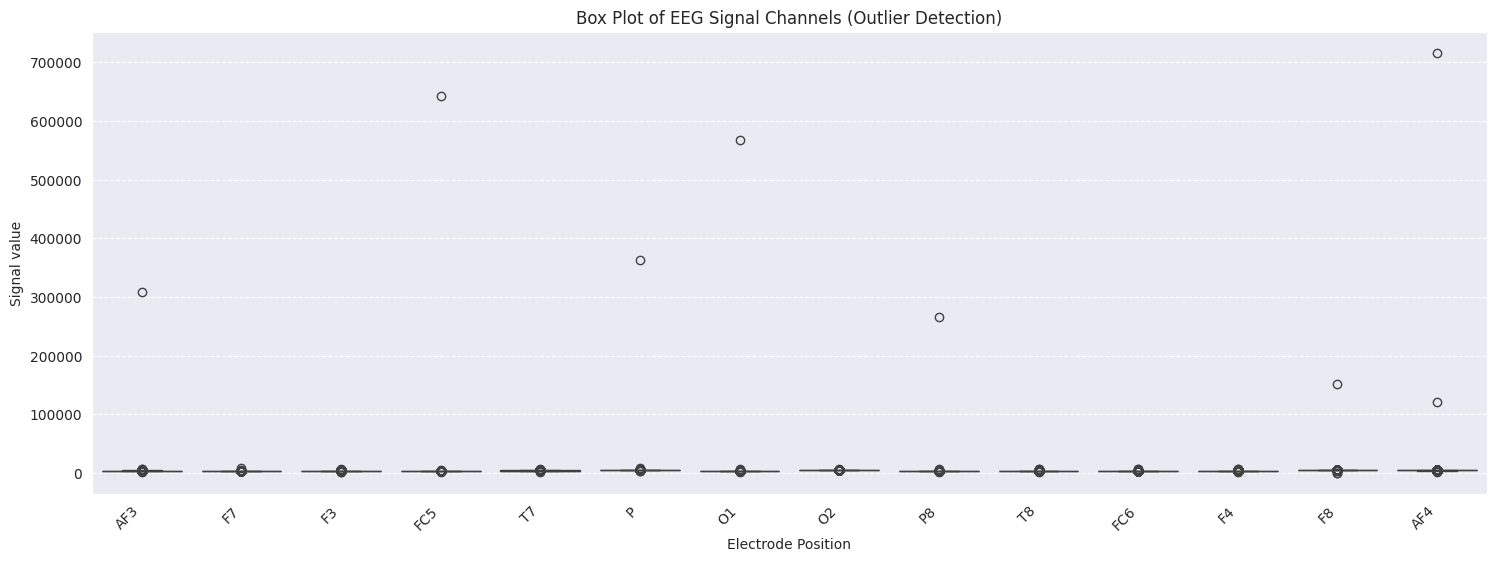

In [7]:
eeg_cols = df.drop(columns=['eye_state']).columns
plt.figure(figsize=(18,6))
sns.boxplot(data=df[eeg_cols])
plt.title("Box Plot of EEG Signal Channels (Outlier Detection)")
plt.ylabel("Signal value")
plt.xlabel("Electrode Position")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [8]:
df_clean = df.copy()
initial_row_count = len(df_clean)

# Perform separate IQR-based cleaning for each signal column
for col in eeg_cols:
    # 1. Calculate the quartiles and IQR
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. Determine the Lower and Upper Limits according to the 1.5 IQR rule
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Filter the data: Reassign those within the limits as df_clean
    # This loop uses the previously cleaned data set each time.
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


final_row_count = len(df_clean)
removed_count = initial_row_count - final_row_count

# Report the results
print("--- Outlier Cleaning Results ---")
print(f"Original row count: {initial_row_count}")
print(f"Final row count: {final_row_count}")
print(f"Removed rows: {removed_count}")
print(f"Discard Rate: {removed_count / final_row_count * 100:.2f}%")
print("Cleaned Data Set Statistics (No more extreme max values):")
print(df_clean[eeg_cols].describe())

--- Outlier Cleaning Results ---
Original row count: 14980
Final row count: 10848
Removed rows: 4132
Discard Rate: 38.09%
Cleaned Data Set Statistics (No more extreme max values):
                AF3            F7            F3           FC5            T7  \
count  10848.000000  10848.000000  10848.000000  10848.000000  10848.000000   
mean    4292.433905   4002.781443   4259.610755   4117.045828   4338.160716   
std       17.052410     20.317394     11.600490     12.812994      9.385640   
min     4239.490000   3946.150000   4227.180000   4081.030000   4310.770000   
25%     4280.510000   3989.230000   4250.260000   4107.690000   4331.280000   
50%     4291.280000   4002.050000   4261.540000   4117.950000   4337.440000   
75%     4303.080000   4015.380000   4266.150000   4124.620000   4344.620000   
max     4357.440000   4062.560000   4292.310000   4152.310000   4365.640000   

                  P            O1            O2            P8            T8  \
count  10848.000000  10848.00

In [9]:
x = df_clean.drop(columns=['eye_state'])
y = df_clean['eye_state']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

print("--- Data Clustering Results  ---")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

--- Data Clustering Results  ---
X_train: (8678, 14)
X_test: (2170, 14)
y_train: (8678,)
y_test: (2170,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9631


In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=['True: Closed (0)', 'True: Opened (1)'],
                     columns=['Predict: Closed (0)', 'Predict: Opened (1)'])

print("\n🧾 Confusion Matrix:")
print(cm_df)


🧾 Confusion Matrix:
                  Predict: Closed (0)  Predict: Opened (1)
True: Closed (0)                 1179                   37
True: Opened (1)                   43                  911
